In [1]:
import sys
sys.path.append('..')
from Simulation.helper_functions import calculate_DGv3, minimize_mol, calculate_entropy, get_dihedrals_by_name, kjmol_to_prop, get_cluster_asignments_ordered
from Simulation.helper_functions import SOLVENT_DICT as solvent_dict
from Simulation.helper_functions import MODEL_PATH
import matplotlib.pyplot as plt
from matplotlib import cm
from rdkit import Chem
import numpy as np

def get_color_from_sd(sd):
    return cm.RdBu(sd/80)


In [29]:
PLOTFOLDER = "/fileserver/birch/birch1/kpaul/pine8/multi_solvent_pub/manuscript/Plots/"

In [30]:
nicenames = ""
for solvent in solvent_dict:
    nicenames += solvent_dict[solvent]["nice_name"] + ", "
nicenames

'TIP3P, Chloroform, Methanol, DMSO, DMPU, Diethyl Ether, Ethanol, DMF, DCM, Toluene, Benzene, Hexane, Acetonitrile, Acetone, Acetic Acid, 1,4-Dioxane, Nitrobenzene, HMPA, MTBE, IPA, Hexafluorobenzene, Pyridine, THF, Ethyl Acetate, Sulfolane, Nitromethane, Butyl Formate, NMP, Octanol, Cyclohexane, Glycerin, Carbon Tetrachloride, DME, 2-Nitropropane, Trifluorotoluene, Hexafluoroacetone, Propionitrile, Benzonitrile, Oxylol, '

In [31]:
def get_Jtot(tup):
    return (tup[1]-tup[0])*500

In [32]:
DMSO = (3.329792,3.350559)
Methanol = (3.476629,3.496138)
Acetone = (3.411923,3.432143)
Chloroform = (3.499005,3.517427)
Benzene = (3.113495,3.132309)
Acetonitrile = (3.414090,3.433687)
Water = (3.479675,3.498249)
Pyridine = (3.581476,3.601787)
THF = (3.383884,3.404144)

In [33]:
smiles = "COCCO"
reference_J_couplings = {"Methanol":(Methanol[1]-Methanol[0])*500,"acetone":(Acetone[1]-Acetone[0])*500,"Chloroform":(Chloroform[1]-Chloroform[0])*500,"Benzol":(Benzene[1]-Benzene[0])*500,"acetonitrile":(Acetonitrile[1]-Acetonitrile[0])*500,"tip3p":(Water[1]-Water[0])*500,"pyridine":(Pyridine[1]-Pyridine[0])*500,"THF":(THF[1]-THF[0])*500,"DMSO":(DMSO[1]-DMSO[0])*500}

In [34]:
get_Jtot(Water), get_Jtot(Chloroform)

(9.287000000000045, 9.21100000000008)

In [35]:
model_file = MODEL_PATH

In [36]:
solvent_results = {}
for solvent in reference_J_couplings.keys():
    mol = Chem.MolFromSmiles(smiles)
    traj, mol = calculate_DGv3(mol,256,True,0)
    mol, gnn_traj, gnn_energies = minimize_mol(mol,solvent,model_file,solvent_dict,return_traj=True,constraints=None)
    cluster_center_traj, cluster_energies, cluster_mol = get_cluster_asignments_ordered(gnn_traj,gnn_energies,thresh=0.05,energy_thresh=100,mol=mol)
    entropies, free_energies = calculate_entropy(cluster_mol,solvent,model_file,solvent_dict)
    solvent_results[solvent] = (cluster_center_traj,cluster_energies, free_energies)

Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Platform:  GPU  ready
Platform:  GPU  ready
All parallel systems have the same forces as the reference System


100%|██████████| 1/1 [00:10<00:00, 10.84s/it]


Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Platform:  GPU  ready
Platform:  GPU  ready
All parallel systems have the same forces as the reference System


100%|██████████| 1/1 [00:01<00:00,  1.15s/it]


Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Platform:  GPU  ready
Platform:  GPU  ready
All parallel systems have the same forces as the reference System


100%|██████████| 1/1 [00:07<00:00,  7.94s/it]


Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Platform:  GPU  ready
Platform:  GPU  ready
All parallel systems have the same forces as the reference System


100%|██████████| 1/1 [00:01<00:00,  1.14s/it]


Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Platform:  GPU  ready
Platform:  GPU  ready
All parallel systems have the same forces as the reference System


100%|██████████| 1/1 [00:08<00:00,  8.51s/it]


Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Platform:  GPU  ready
Platform:  GPU  ready
All parallel systems have the same forces as the reference System


100%|██████████| 1/1 [00:01<00:00,  1.11s/it]


Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Platform:  GPU  ready
Platform:  GPU  ready
All parallel systems have the same forces as the reference System


100%|██████████| 1/1 [00:08<00:00,  8.80s/it]


Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Platform:  GPU  ready
Platform:  GPU  ready
All parallel systems have the same forces as the reference System


100%|██████████| 1/1 [00:01<00:00,  1.15s/it]


Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Platform:  GPU  ready
Platform:  GPU  ready
All parallel systems have the same forces as the reference System


100%|██████████| 1/1 [00:08<00:00,  8.06s/it]


Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Platform:  GPU  ready
Platform:  GPU  ready
All parallel systems have the same forces as the reference System


100%|██████████| 1/1 [00:01<00:00,  1.09s/it]


Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Platform:  GPU  ready
Platform:  GPU  ready
All parallel systems have the same forces as the reference System


100%|██████████| 1/1 [00:07<00:00,  7.64s/it]


Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Platform:  GPU  ready
Platform:  GPU  ready
All parallel systems have the same forces as the reference System


100%|██████████| 1/1 [00:01<00:00,  1.24s/it]


Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Platform:  GPU  ready
Platform:  GPU  ready
All parallel systems have the same forces as the reference System


100%|██████████| 1/1 [00:08<00:00,  8.82s/it]


Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Platform:  GPU  ready
Platform:  GPU  ready
All parallel systems have the same forces as the reference System


100%|██████████| 1/1 [00:01<00:00,  1.20s/it]


Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Platform:  GPU  ready
Platform:  GPU  ready
All parallel systems have the same forces as the reference System


100%|██████████| 1/1 [00:08<00:00,  8.54s/it]


Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Platform:  GPU  ready
Platform:  GPU  ready
All parallel systems have the same forces as the reference System


100%|██████████| 1/1 [00:01<00:00,  1.15s/it]


Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Platform:  GPU  ready
Platform:  GPU  ready
All parallel systems have the same forces as the reference System


100%|██████████| 1/1 [00:08<00:00,  8.35s/it]


Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Platform:  GPU  ready
Platform:  GPU  ready
All parallel systems have the same forces as the reference System


100%|██████████| 1/1 [00:01<00:00,  1.11s/it]


In [37]:
gb_solvent_results = {}
for solvent in reference_J_couplings.keys():
    mol = Chem.MolFromSmiles(smiles)
    traj, mol = calculate_DGv3(mol,256,True,0)
    mol, gnn_traj, gnn_energies = minimize_mol(mol,"gbneck_" + solvent,model_file,solvent_dict,return_traj=True,constraints=None)
    cluster_center_traj, cluster_energies, cluster_mol = get_cluster_asignments_ordered(gnn_traj,gnn_energies,thresh=0.05,energy_thresh=100,mol=mol)
    entropies, free_energies = calculate_entropy(cluster_mol,"gbneck_" +solvent,model_file,solvent_dict)
    gb_solvent_results[solvent] = (cluster_center_traj,cluster_energies,free_energies)

SA model:  None
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
SA model:  None
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
SA model:  None
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
SA model:  None
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
SA model:  None
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF 

In [38]:
min_populations = []
for solvent in reference_J_couplings.keys():
    cluster_center_traj, cluster_energies, free_energies = solvent_results[solvent]
    gnn_dh = get_dihedrals_by_name(cluster_center_traj,*("O1,C2,C3,O2".split(",")))
    selection = (gnn_dh < 2.1) & (gnn_dh > -2.1)
    min_pre = np.sum(kjmol_to_prop(np.array(free_energies))[selection.flatten()])
    min_populations.append(1-min_pre)

min_gb_populations = []
for solvent in reference_J_couplings.keys():
    cluster_center_traj, cluster_energies, free_energies = gb_solvent_results[solvent]
    gnn_dh = get_dihedrals_by_name(cluster_center_traj,*("O1,C2,C3,O2".split(",")))
    selection = (gnn_dh < 2.1) & (gnn_dh > -2.1)
    min_pre = np.sum(kjmol_to_prop(np.array(free_energies))[selection.flatten()])
    min_gb_populations.append(1-min_pre)

In [39]:
def get_color_from_sd(sd):
    return cm.RdBu(sd/80)

In [40]:
Js = []
colors = []
names = []
for s in reference_J_couplings.keys():
    Js.append(np.sum(reference_J_couplings[s]))
    colors.append(get_color_from_sd(solvent_dict[s]['dielectric']))
    names.append(s)

In [47]:
min_populations, reference_J_couplings.keys()

([0.052463742936593787394,
  0.070032199179402626925,
  0.004918291201810023373,
  0.017312044952547807949,
  0.023098285864166619261,
  0.028951245723528006514,
  0.07609156163124008879,
  0.04907498816264741772,
  0.130309667745375737],
 dict_keys(['Methanol', 'acetone', 'Chloroform', 'Benzol', 'acetonitrile', 'tip3p', 'pyridine', 'THF', 'DMSO']))

In [42]:
# set font size
plt.rcParams.update({'font.size': 8})

/tmp/ipykernel_1516453/2853980683.py:6: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.2)


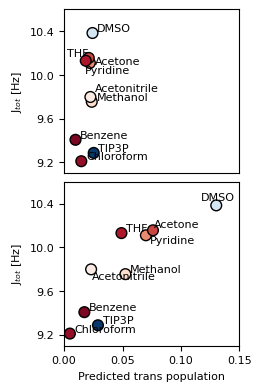

In [43]:
fig, axd = plt.subplot_mosaic([["gb"],["main"]],figsize=(2.5,3.8),constrained_layout=True)



# set vertical distance between subplots
plt.subplots_adjust(hspace=0.2)

ax = axd["main"]
ax.scatter(min_populations,Js,c=colors,s=60,marker='o',edgecolors='black')
# ax.errorbar(min_populations,Js,xerr=populations_std,fmt='o',color='black',zorder=0)
ax.set_xlabel("Predicted Population of trans rotamer")
ax.set_ylabel("JHH + JHH' Coupling (Hz)")
# ax.set_title("GNN")

for i in range(len(min_populations)):

    shifty=0.015
    shiftx=0.002
    if names[i] == "acetonitrile":
        shifty = -0.095
        shiftx = -0.001
    if names[i] == "acetone":
        shifty = 0.075
        shiftx = 0.005
    if names[i] == "THF":
        shifty = 0.02
        # shiftx = -0.014
    if names[i] == "pyridine":
        shiftx = -0.005
        shifty = -0.12
    if names[i] == "DMSO":
        shifty = 0.05
        shiftx = -0.015
    ax.text(min_populations[i]+0.002+shiftx,Js[i]+shifty,solvent_dict[names[i]]["nice_name"],fontsize=8)

ax = axd["gb"]
ax.scatter(min_gb_populations,Js,c=colors,s=60,marker='o',edgecolors='black')
# ax.errorbar(min_populations,Js,xerr=populations_std,fmt='o',color='black',zorder=0)
ax.get_xaxis().set_visible(False)
# ax.set_title("GBneck2")

for i in range(len(min_populations)):

    shifty=0.015
    shiftx=0.002
    if names[i] == "acetonitrile":
        shifty = 0.05
    if names[i] == "acetone":
        shifty = -0.01
        shiftx = 0.002
    if names[i] == "THF":
        shifty = 0.04
        shiftx = -0.018
    if names[i] == "pyridine":
        shiftx = -0.005
        shifty = -0.14

    ax.text(min_gb_populations[i]+0.002+shiftx,Js[i]+shifty,solvent_dict[names[i]]["nice_name"],fontsize=8)

for ax in axd.values():
    ax.set_xlabel("Predicted trans population")
    ax.set_ylabel(r"J$_{tot}$ [Hz]")
    ax.set_xlim(0,0.15)
    ax.set_ylim(9.1,10.6)
    ax.set_yticks([9.2,9.6,10,10.4])

fig.savefig(PLOTFOLDER+"JHH_h.pdf",bbox_inches='tight')

In [48]:
min_populations[4], min_populations[7]# Aceonitrile, THF

(0.023098285864166619261, 0.04907498816264741772)

/tmp/ipykernel_1516453/1555543234.py:7: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.2)


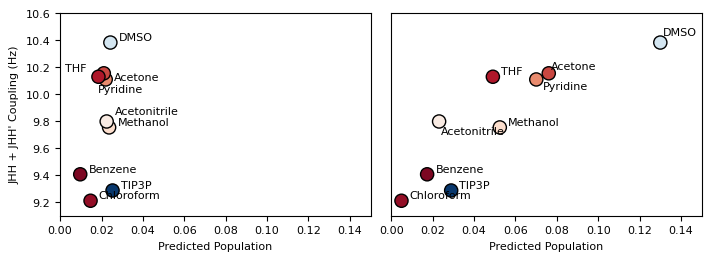

In [16]:
fig, axd = plt.subplot_mosaic([["gb","main"]],figsize=(7,2.5),constrained_layout=True)

# set font size
plt.rcParams.update({'font.size': 8})

# set vertical distance between subplots
plt.subplots_adjust(hspace=0.2)

ax = axd["main"]
ax.scatter(min_populations,Js,c=colors,s=90,marker='o',edgecolors='black')
# ax.errorbar(min_populations,Js,xerr=populations_std,fmt='o',color='black',zorder=0)
ax.set_xlabel("Predicted Population of trans rotamer")
ax.set_ylabel("JHH + JHH' Coupling (Hz)")
# ax.set_title("GNN")

for i in range(len(min_populations)):

    shifty=0.015
    shiftx=0.002
    if names[i] == "acetonitrile":
        shifty = -0.095
        shiftx = -0.001
    if names[i] == "acetone":
        shifty = 0.075
        shiftx = 0.005
    if names[i] == "THF":
        shifty = 0.02
        # shiftx = -0.014
    if names[i] == "pyridine":
        shiftx = -0.005
        shifty = -0.12
    if names[i] == "DMSO":
        shifty = 0.05
        shiftx = -0.001
    ax.text(min_populations[i]+0.002+shiftx,Js[i]+shifty,solvent_dict[names[i]]["nice_name"],fontsize=8)
ax.get_yaxis().set_visible(False)

ax = axd["gb"]
ax.scatter(min_gb_populations,Js,c=colors,s=90,marker='o',edgecolors='black')
# ax.errorbar(min_populations,Js,xerr=populations_std,fmt='o',color='black',zorder=0)
# ax.set_title("GBneck2")

for i in range(len(min_populations)):

    shifty=0.015
    shiftx=0.002
    if names[i] == "acetonitrile":
        shifty = 0.05
    if names[i] == "acetone":
        shifty = -0.01
        shiftx = 0.002
    if names[i] == "THF":
        shifty = 0.04
        shiftx = -0.018
    if names[i] == "pyridine":
        shiftx = -0.005
        shifty = -0.14
    ax.text(min_gb_populations[i]+0.002+shiftx,Js[i]+shifty,solvent_dict[names[i]]["nice_name"],fontsize=8)

for ax in axd.values():
    ax.set_xlabel("Predicted Population")
    ax.set_ylabel("JHH + JHH' Coupling (Hz)")
    ax.set_xlim(0,0.15)
    ax.set_ylim(9.1,10.6)

fig.savefig(PLOTFOLDER+"/JHH_v.pdf",bbox_inches='tight')

### Compound I4

In [17]:
smiles = "COCCOC"
reference_J_couplings = {"tip3p":9.25,"DMSO":9.71,"Chloroform":9.45,"Methanol":9.43,"Hexan":10.33}
model_file = MODEL_PATH

In [18]:
solvent_results = {}
for solvent in reference_J_couplings.keys():
    mol = Chem.MolFromSmiles(smiles)
    traj, mol = calculate_DGv3(mol,256,True,0)
    mol, gnn_traj, gnn_energies = minimize_mol(mol,solvent,model_file,solvent_dict,return_traj=True,constraints=None)
    cluster_center_traj, cluster_energies, cluster_mol = get_cluster_asignments_ordered(gnn_traj,gnn_energies,thresh=0.05,energy_thresh=100,mol=mol)
    entropies, free_energies = calculate_entropy(cluster_mol,solvent,model_file,solvent_dict)
    solvent_results[solvent] = (cluster_center_traj,cluster_energies, free_energies)

Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Platform:  GPU  ready
Platform:  GPU  ready
All parallel systems have the same forces as the reference System


  0%|          | 0/1 [00:00<?, ?it/s][W manager.cpp:335] Warning: FALLBACK path has been taken inside: runCudaFusionGroup. This is an indication that codegen Failed for some reason.
To debug try disable codegen fallback path via setting the env variable `export PYTORCH_NVFUSER_DISABLE=fallback`
 (function runCudaFusionGroup)
100%|██████████| 1/1 [00:13<00:00, 13.42s/it]


Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Platform:  GPU  ready
Platform:  GPU  ready
All parallel systems have the same forces as the reference System


  0%|          | 0/1 [00:00<?, ?it/s][W manager.cpp:335] Warning: FALLBACK path has been taken inside: runCudaFusionGroup. This is an indication that codegen Failed for some reason.
To debug try disable codegen fallback path via setting the env variable `export PYTORCH_NVFUSER_DISABLE=fallback`
 (function runCudaFusionGroup)
100%|██████████| 1/1 [00:06<00:00,  6.53s/it]


Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Platform:  GPU  ready
Platform:  GPU  ready
All parallel systems have the same forces as the reference System


100%|██████████| 1/1 [00:09<00:00,  9.82s/it]


Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Platform:  GPU  ready
Platform:  GPU  ready
All parallel systems have the same forces as the reference System


100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Platform:  GPU  ready
Platform:  GPU  ready
All parallel systems have the same forces as the reference System


100%|██████████| 1/1 [00:10<00:00, 10.14s/it]


Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Platform:  GPU  ready
Platform:  GPU  ready
All parallel systems have the same forces as the reference System


  0%|          | 0/1 [00:00<?, ?it/s][W manager.cpp:335] Warning: FALLBACK path has been taken inside: runCudaFusionGroup. This is an indication that codegen Failed for some reason.
To debug try disable codegen fallback path via setting the env variable `export PYTORCH_NVFUSER_DISABLE=fallback`
 (function runCudaFusionGroup)
100%|██████████| 1/1 [00:06<00:00,  6.60s/it]


Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Platform:  GPU  ready
Platform:  GPU  ready
All parallel systems have the same forces as the reference System


100%|██████████| 1/1 [00:08<00:00,  8.14s/it]


Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Platform:  GPU  ready
Platform:  GPU  ready
All parallel systems have the same forces as the reference System


100%|██████████| 1/1 [00:01<00:00,  1.20s/it]


Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Platform:  GPU  ready
Platform:  GPU  ready
All parallel systems have the same forces as the reference System


100%|██████████| 1/1 [00:12<00:00, 12.86s/it]


Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Platform:  GPU  ready
Platform:  GPU  ready
All parallel systems have the same forces as the reference System


  0%|          | 0/1 [00:00<?, ?it/s][W manager.cpp:335] Warning: FALLBACK path has been taken inside: runCudaFusionGroup. This is an indication that codegen Failed for some reason.
To debug try disable codegen fallback path via setting the env variable `export PYTORCH_NVFUSER_DISABLE=fallback`
 (function runCudaFusionGroup)
100%|██████████| 1/1 [00:06<00:00,  6.09s/it]


In [19]:
gb_solvent_results = {}
for solvent in reference_J_couplings.keys():
    mol = Chem.MolFromSmiles(smiles)
    traj, mol = calculate_DGv3(mol,256,True,0)
    mol, gnn_traj, gnn_energies = minimize_mol(mol,"gbneck_" + solvent,MODEL_PATH,solvent_dict,return_traj=True,constraints=None)
    cluster_center_traj, cluster_energies, cluster_mol = get_cluster_asignments_ordered(gnn_traj,gnn_energies,thresh=0.05,energy_thresh=100,mol=mol)
    entropies, free_energies = calculate_entropy(cluster_mol,"gbneck_" +solvent,MODEL_PATH,solvent_dict)
    gb_solvent_results[solvent] = (cluster_center_traj,cluster_energies,free_energies)

SA model:  None
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
SA model:  None
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready


  0%|          | 0/100 [00:00<?, ?it/s]


SA model:  None
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
SA model:  None
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready


  0%|          | 0/100 [00:00<?, ?it/s]


SA model:  None
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
SA model:  None
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready


  0%|          | 0/100 [00:00<?, ?it/s]


SA model:  None
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
SA model:  None
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready


  0%|          | 0/100 [00:00<?, ?it/s]


SA model:  None
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
SA model:  None
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready


  0%|          | 0/100 [00:00<?, ?it/s]


In [20]:
min_populations = []
for solvent in reference_J_couplings.keys():
    cluster_center_traj, cluster_energies, free_energies = solvent_results[solvent]
    gnn_dh = get_dihedrals_by_name(cluster_center_traj,*("O1,C2,C3,O2".split(",")))
    selection = (gnn_dh < 2.1) & (gnn_dh > -2.1)
    min_pre = np.sum(kjmol_to_prop(np.array(free_energies))[selection.flatten()])
    min_populations.append(1-min_pre)

min_gb_populations = []
for solvent in reference_J_couplings.keys():
    cluster_center_traj, cluster_energies, free_energies = gb_solvent_results[solvent]
    gnn_dh = get_dihedrals_by_name(cluster_center_traj,*("O1,C2,C3,O2".split(",")))
    selection = (gnn_dh < 2.1) & (gnn_dh > -2.1)
    min_pre = np.sum(kjmol_to_prop(np.array(free_energies))[selection.flatten()])
    min_gb_populations.append(1-min_pre)

In [21]:
Js = []
colors = []
names = []
for s in reference_J_couplings.keys():
    Js.append(np.sum(reference_J_couplings[s]))
    colors.append(get_color_from_sd(solvent_dict[s]['dielectric']))
    names.append(s)

/tmp/ipykernel_1516453/2734657855.py:6: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.2)


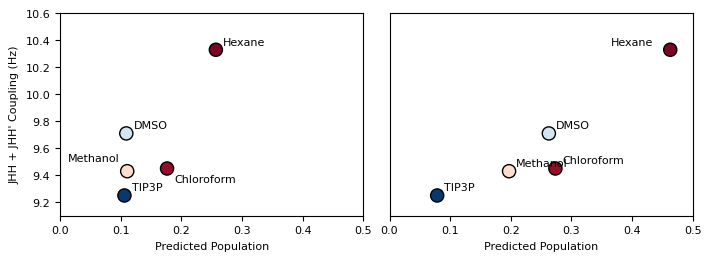

In [22]:
fig, axd = plt.subplot_mosaic([["gb","main"]],figsize=(7,2.5),constrained_layout=True)
# set font size
plt.rcParams.update({'font.size': 8})

# set vertical distance between subplots
plt.subplots_adjust(hspace=0.2)

ax = axd["main"]
ax.scatter(min_populations,Js,c=colors,s=90,marker='o',edgecolors='black')
# ax.errorbar(min_populations,Js,xerr=populations_std,fmt='o',color='black',zorder=0)
ax.set_xlabel("Predicted Population of trans rotamer")
ax.set_ylabel("JHH + JHH' Coupling (Hz)")
# ax.set_title("GNN")

for i in range(len(min_populations)):

    shifty=0.035
    shiftx=0.01
    if names[i] == "Hexan":
        shiftx = -0.1

    #     shiftx = -0.001
    ax.text(min_populations[i]+0.002+shiftx,Js[i]+shifty,solvent_dict[names[i]]["nice_name"],fontsize=8)

ax.get_yaxis().set_visible(False)


ax = axd["gb"]
ax.scatter(min_gb_populations,Js,c=colors,s=90,marker='o',edgecolors='black')
# ax.errorbar(min_populations,Js,xerr=populations_std,fmt='o',color='black',zorder=0)
# ax.set_title("GBneck2")

for i in range(len(min_populations)):

    shifty=0.035
    shiftx=0.01
    if names[i] == "Chloroform":
        shifty = -0.1
    elif names[i] == "Methanol":
        shiftx = -0.1
        shifty = 0.075

    ax.text(min_gb_populations[i]+0.002+shiftx,Js[i]+shifty,solvent_dict[names[i]]["nice_name"],fontsize=8)

for ax in axd.values():
    ax.set_xlabel("Predicted Population")
    ax.set_ylabel("JHH + JHH' Coupling (Hz)")
    ax.set_xlim(0,0.5)
    ax.set_ylim(9.1,10.6)

fig.savefig("/fileserver/pine/pine8/kpaul/multi_solvent_pub/manuscript/Plots/JHH_I4_v.pdf",bbox_inches='tight')

/tmp/ipykernel_1516453/2230223568.py:6: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.2)


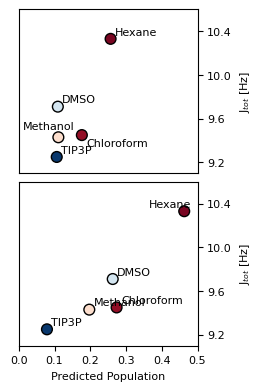

In [28]:
fig, axd = plt.subplot_mosaic([["gb"],["main"]],figsize=(2.5,3.8),constrained_layout=True)
# set font size
plt.rcParams.update({'font.size': 8})

# set vertical distance between subplots
plt.subplots_adjust(hspace=0.2)

ax = axd["main"]
ax.scatter(min_populations,Js,c=colors,s=60,marker='o',edgecolors='black')
# ax.errorbar(min_populations,Js,xerr=populations_std,fmt='o',color='black',zorder=0)
ax.set_xlabel("Predicted Population of trans rotamer")
ax.set_ylabel("JHH + JHH' Coupling (Hz)")
# ax.set_title("GNN")

for i in range(len(min_populations)):

    shifty=0.035
    shiftx=0.01
    if names[i] == "Hexan":
        shiftx = -0.1

    #     shiftx = -0.001
    ax.text(min_populations[i]+0.002+shiftx,Js[i]+shifty,solvent_dict[names[i]]["nice_name"],fontsize=8)




ax = axd["gb"]
ax.get_xaxis().set_visible(False)

ax.scatter(min_gb_populations,Js,c=colors,s=60,marker='o',edgecolors='black')
# ax.errorbar(min_populations,Js,xerr=populations_std,fmt='o',color='black',zorder=0)
# ax.set_title("GBneck2")

for i in range(len(min_populations)):

    shifty=0.035
    shiftx=0.01
    if names[i] == "Chloroform":
        shifty = -0.1
    elif names[i] == "Methanol":
        shiftx = -0.1
        shifty = 0.075

    ax.text(min_gb_populations[i]+0.002+shiftx,Js[i]+shifty,solvent_dict[names[i]]["nice_name"],fontsize=8)

for ax in axd.values():
    ax.set_xlabel("Predicted Population")
    ax.set_ylabel(r"J$_{tot}$ [Hz]")
    ax.set_xlim(0,0.5)
    ax.set_ylim(9.1,10.6)
    ax.set_yticks([9.2,9.6,10,10.4])
    # put ticks on the right side
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")

fig.savefig("/fileserver/pine/pine8/kpaul/multi_solvent_pub/manuscript/Plots/JHH_I4_h.pdf",bbox_inches='tight')